In [8]:
import numpy as np
import torch
from cebmf_torch import *
import matplotlib.pyplot  as plt
x = torch.tensor([1.0, 1.0, -0.5])
s = torch.tensor([1.0, 1.0, 1.0])
res = ebnm_point_exp(x, s, steps=2000, lr=0.02)
    # Expected numbers from original tests (allow small tolerance)
 

In [14]:
res.a

tensor(4.1939)

In [15]:
res.w

tensor(0.0050)

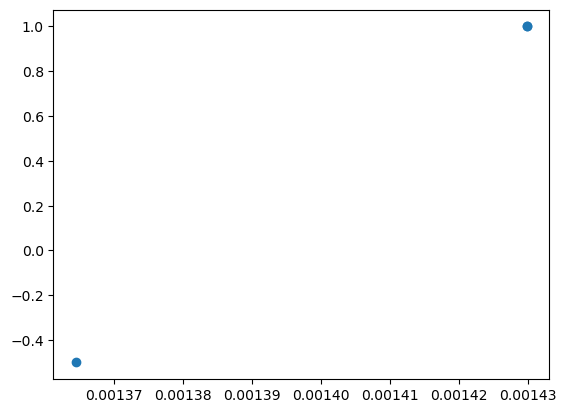

In [9]:
plt.scatter( res.post_mean, x)

In [10]:
res.log_lik # -3.636553632132083

-1.1688940525054932

In [11]:
float(res.w)#0.9999563044116645

0.004968094639480114

In [12]:
float(res.a)#3.047337093696241

4.193866729736328

In [13]:
float(res.mu)# 0.0

0.4988369047641754

In [ ]:
import torch
import math

# If you saved the previous implementation in torch_only_point_exponential.py:
# from torch_only_point_exponential import ebnm_point_exp_solver

torch.manual_seed(0)
dtype = torch.float64
device = "cpu"

# Generate data (same structure as your NumPy snippet)
true_val1 = torch.randn(100, dtype=dtype, device=device)          # ~ N(0,1)
true_val0 = torch.zeros(200, dtype=dtype, device=device)

observations_mu_1 = true_val1 + torch.randn(100, dtype=dtype, device=device)  # add N(0,1) noise
observations_mu_0 = true_val0 + torch.randn(200, dtype=dtype, device=device)  # add N(0,1) noise

betahat = torch.cat([observations_mu_1, observations_mu_0], dim=0)            # shape (300,)
sebetahat = torch.ones_like(betahat)                                          # all s = 1

# Fit point-exponential EBNM
res = ebnm_point_exp(
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

# Quick summary
 

AttributeError: 'EBNMExpResult' object has no attribute 'pi'

tensor([0.2643, 0.4815, 0.2290, 0.4656, 0.3945, 0.4160, 0.3064, 0.5252, 0.2912,
        0.5630, 0.9637, 0.7292, 0.7008, 0.3352, 0.3621, 0.8641, 0.5802, 0.3422,
        0.2259, 0.2830, 0.5027, 0.2541, 0.4088, 0.4274, 0.8777, 0.1944, 0.2459,
        0.2106, 0.3530, 0.5595, 0.5366, 0.3766, 0.2492, 0.2945, 0.4503, 0.1848,
        0.2021, 0.3686, 0.7013, 0.3953, 0.8563, 0.3960, 0.2531, 0.4002, 0.6613,
        0.2882, 0.1776, 0.7710, 0.1123, 0.6823, 0.2529, 0.2596, 0.3184, 1.2748,
        0.5149, 0.6508, 0.1853, 0.1768, 0.4276, 0.2997, 0.3874, 0.3631, 0.6488,
        0.5465, 0.2540, 0.6180, 0.4732, 0.3924, 0.3739, 0.9035, 0.1326, 0.4832,
        0.7808, 0.2165, 0.3788, 0.6971, 0.6480, 0.9763, 0.2384, 0.8010, 0.1945,
        0.3990, 0.1892, 0.6351, 0.5592, 0.3944, 0.8213, 0.1606, 0.2874, 0.8441,
        0.3951, 1.7785, 0.4805, 2.0405, 0.2241, 1.3879, 0.4546, 0.7707, 0.3123,
        0.3923, 0.4583, 0.3498, 0.2228, 0.2311, 0.5028, 0.5267, 0.6963, 0.2803,
        0.5322, 0.2625, 0.2668, 0.4402, 

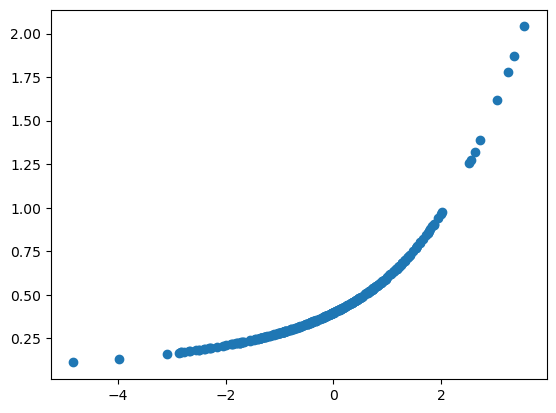

In [19]:
plt.scatter(betahat, res.post_mean   )